## Домашнє завдання на тему "Перевірка вибірки на нормальність"

0.Зчитайте дані з `data.csv` та запишіть значення колонки data у форматі np.ndarray в змінну data. Ми будемо далі працювати з цією змінною.

In [1]:
import pandas as pd
import numpy as np

data_path = '../data/data.csv'
df = pd.read_csv(data_path)
data = df['data'].values
print(data)

[17.49945292 19.66239904  7.18282343 29.84162485  9.23938649 14.94951581
 23.0172885  12.52827148 13.65228669 14.54595431 23.30872427 33.75324808
 20.24923636 13.29244733 23.23434992 16.4230418  19.88521702 27.05000732
 15.5127743  20.05415151 14.73135264 19.06139498 21.53942271 14.06732571
 17.9670682  18.58289581 16.17406993 12.87432628 11.47269664 19.07902883
 18.38565824 33.38820073  5.39139454 20.67635903 22.22266722 28.15780318
 23.01114324 14.93471778 20.00005857 23.25411543 18.11895082 24.62607043
  8.79145607 30.387108   28.80606806 17.98593597 23.66804468 20.28782355
 15.02518827 20.52626131 26.00219532 17.71344489 17.74598346 19.55317542
 22.60097798 27.67027538 16.19192417 23.05037746 21.29669604  8.84832568
 17.48410111 19.20602661 19.76257856 21.9560206   7.75806171 20.27753314
 15.93394654 11.36336584 23.14577858 24.41167746 16.08049839 25.05473769
 17.71090111 20.39893405 13.40756632 29.50692234  4.04330326 19.45128426
 24.17071763  7.79920072 18.86318441 19.53668801 24

Запустіть код нижче. Для коректної робити всіх подальших методів дані мають бути у вигляді одновимірного вектора, тобто мати розмір (100,).

In [4]:
data.shape

(100,)

## Перевірка вибірки на нормальність

1.**Візуалізація розподілу**

Подивимось спершу на розподіл наших даних. Для цього побудуємо розподіл даних (графік на вигляд як гістограма, тільки він нормований так, аби сума під кривою була рівна 1), а на нього накладемо лінійний графік щільності (PDF - для побудови використовуємо `scipy.stats.norm.pdf(...)`) теоретичного нормального розподілу з середнім та стандартним відхиленням як у наших даних.

Візуалізацію будуємо за аналогією прикладу, що наводився у лекції, коли ми будували кілька кривих щільності для одних і тих самих даних, тільки значно більш спрощено, бо розподіл для порівняння у нас лише один - нормальний.

Побудуйте графік як наведено в очікуваному результаті та напишіть ваш висновок, чи схоже, що дані розподілені нормально?

Підказка: весь графік будується за 6 рядків коду, три з яких - підписи осей і графіку. Аби побудувати лінійний графік функції щільності та він наклався на гістограму, необхідно задати значення іксів з діапазону значень наших даних. Ці значення вже задані для вас, залишилось дописати 5 рядочків коду :)

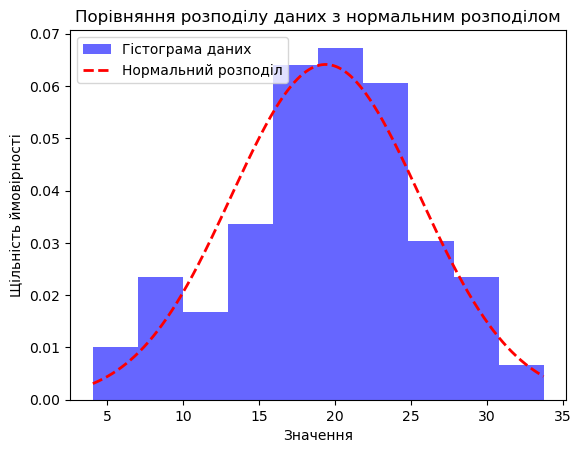

In [21]:
import matplotlib.pyplot as plt
from scipy.stats import norm

plt.hist(data, bins = 'auto', density = True, alpha = 0.6, color = 'blue', label = 'Гістограма даних')

mu, sigma = np.mean(data), np.std(data)
x_axis = np.arange(data.min(), data.max(), 0.01)
pdf = norm.pdf(x_axis, mu, sigma)

plt.plot(x_axis, pdf, 'r--', linewidth = 2, label = 'Нормальний розподіл')

plt.title('Порівняння розподілу даних з нормальним розподілом')
plt.xlabel('Значення')
plt.ylabel('Щільність ймовірності')
plt.legend(loc = 'best')
plt.show()

Відповідь: з аналізу графіка видно, що гістограма даних і крива нормального розподілу мають схожий вигляд,  думаю, що дані мають тенденцію до нормального розподілу.

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1SB_HOIgwfZXrtglBBlDfMYjg2eGGBSIX)


2.**QQ графік**

Ще одним візуалізаційним методом перевірки розподілу вибірки даних на нормальність є графік квантиль-квантиль, Q-Q графік або QQ графік. У лекції ми розбирали, що це за графік, та як його інтерпретувати.

Побудуйте QQ-Plot для порівняння з нормальним розподілом наших даних та напишіть висновок з графіку, чи можна сказати, що дані розподілені за нормальним законом?

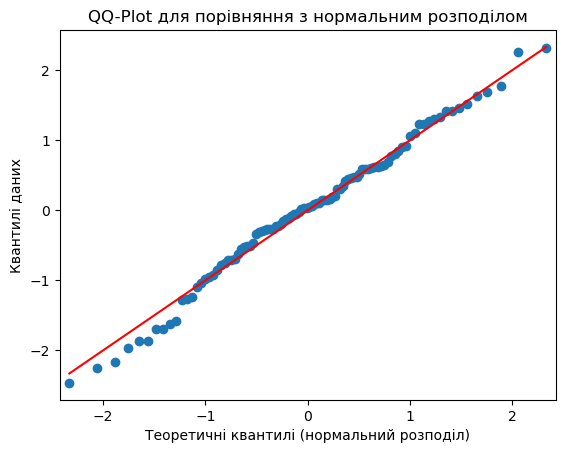

In [27]:
import statsmodels.api as sm

sm.qqplot(data, line='s', fit=True, dist=norm)
plt.title('QQ-Plot для порівняння з нормальним розподілом')
plt.xlabel('Теоретичні квантилі (нормальний розподіл)')
plt.ylabel('Квантилі даних')
plt.show()

Відповідь: більшість точок лежить близько до червоної діагональної лінії, що свідчить про схожість розподілу даних із нормальним законом, окрім невеликих відхилень у хвостах розподілу.

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1-eDd16OVgqEjzFUBjJJzSMcwSrzNNm_V)

3.**Тест Шапіро-Вілка**

Тест Шапіро-Вілка визначає для вибірки, наскільки ймовірно, що вона була витягнута з нормального розподілу.
Нульова гіпотеза H0 тесту Шапіро-Вилка полягає в тому, що випадкова величина, вибірка якої відома, розподілена за нормальним законом. Альтернативна гіпотеза H1 полягає в тому, що закон розподілу **не** є нормальним.

**Задача**: протестувати нашу вибірку на нормальність з допомогою теcта Шапіро-Вілка, реалізованого в функцію [scipy.stats.shapiro](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html). Висновок зробіть на основі аналізу p-значення. На рівні значущості = 0.05 чи можемо ми відхилити гіпотезу Н0? Відповідь можна надати текстом, або написати простий if-else блок для виведення висновку спираючись на отримане p-значення. Нагадування:
- p <= alpha: відхиляємо H0.
- p > alpha: не можемо відхилити H0.

Також пропоную вам переглянути оце [відео](https://youtu.be/eh9eYLBecWk), тут розказується про QQ графік, тест Шапіро, та звʼязок між ними.


In [33]:
from scipy import stats

stat, p_value = stats.shapiro(data)

alpha = 0.05
print(f"Статистика тесту: {stat:.4f}")
print(f"p-значення: {p_value:.10f}")

if p_value <= alpha:
    print("Висновок: на рівні значущості 0.05 ми ОТРИМУЄМО ПІДСТАВИ ВІДХИЛИТИ H0.")
    print("Дані НЕ розподілені нормально.")
else:
    print("Висновок: на рівні значущості 0.05 ми НЕ МАЄМО ПІДСТАВ ВІДХИЛИТИ H0.")
    print("Дані відповідають нормальному розподілу.")

Статистика тесту: 0.9888
p-значення: 0.5677973107
Висновок: на рівні значущості 0.05 ми НЕ МАЄМО ПІДСТАВ ВІДХИЛИТИ H0.
Дані відповідають нормальному розподілу.
